WEEKLY QUIZ WEEK 9위클리퀴즈 9주차입니다.

좌측상단에 파일->Drive에 사본저장->구글 드라이브에 있는 사본으로 문제푸신후 실행 제출부탁드립니다.

제출시 상단의 노트제목은 "week9_이름"으로 변경하시고 우측상단에 공유 눌러서 링크복사 후에 링크올리시면됩니다.

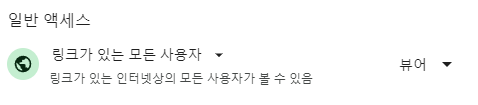

#머핀과 치와와 예측(캐글 데이터)
##링크 : https://drive.google.com/drive/folders/1NY27YOKeWkrTuNanLl9STyAT5eo2m2o7?usp=sharing

### 라이브러리 Improt 및 데이터 불러오기

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, callbacks

# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from glob import glob
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt



In [ ]:
IMG_CHANNELS = 3
IMG_ROWS = 150
IMG_COLS = 150

CLASSES = 2  # 치와와 또는 머핀

### 이미지 사이즈 150,150으로 바꾸기

In [ ]:
# 각 폴더에서 이미지 100개씩 불러오기
chi_images_train = glob('/content/drive/MyDrive/data/train/chihuahua/*.jpg')
chi_images_test = glob('/content/drive/MyDrive/data/test/chihuahua/*.jpg')
muf_images_train = glob('/content/drive/MyDrive/data/train/muffin/*.jpg')
muf_images_test = glob('/content/drive/MyDrive/data/test/muffin/*.jpg')

# 전체 이미지 경로 목록
all_images_train = chi_images_train + muf_images_train
all_images_test = chi_images_test + muf_images_test

### 문제 2

    train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary'
        )

    train_dir: 트레이닝 이미지가 포함된 디렉토리 경로입니다
    target_size: 모든 이미지를 (150, 150) 크기로 리사이즈합니다.
    batch_size: 한 번에 생성되는 이미지의 배치 크기입니다.
    class_mode: 'binary'로 설정하면, 이진 분류를 위해 라벨이 0과 1로 지정됩니다.

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
    )
    Test도 동일
    이 코드를 오늘 수업시간에 배운 5.04.CNN_b_e.ipynb를 참고하여 배운대로 코드를 바꿔주세요.


In [ ]:
c_tr_l,m_tr_l ,c_te_l, m_te_l = len(chi_images_train), len(muf_images_train), len(muf_images_test), len(chi_images_test)

# 정답 라벨 부여
y_tr=[1] * c_tr_l + [0] * m_tr_l
y_te=[1] * c_te_l + [0] * m_te_l

# 이미지 불러오기 및 사이즈 조정
images_train = [image.load_img(p, target_size=(IMG_ROWS, IMG_COLS)) for p in all_images_train]
images_test = [image.load_img(p, target_size=(IMG_ROWS, IMG_COLS)) for p in all_images_test]

#  numpy 배열로 변환
image_vector_train = np.asarray([image.img_to_array(img) for img in images_train])
image_vector_test = np.asarray([image.img_to_array(img) for img in images_test])


In [ ]:
len(y_tr)

4733

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_vector_train, y_tr, test_size=0.20, random_state=0)

### 문제 1

    train_datagen = ImageDataGenerator(rescale=1.0/255)
    test_datagen = ImageDataGenerator(rescale=1.0/255)
    이 코드는 이미지 데이터의 각 픽셀 값을 1/255로 스케일링하여 0에서 1 사이의 값으로 변환하는 코드입니다.
    이 코드를 오늘 수업시간에 배운 5.04.CNN_b_e.ipynb를 참고하여 배운대로 코드를 바꿔주세요.

In [ ]:
X_train, X_test = X_train / 255, X_test / 255
image_vector_test = image_vector_test / 255

CNN 모델 구성하기

        1. 첫 번째 컨볼루션 레이어
        32개의 필터
        필터 크기: 3x3
        활성화 함수: ReLU
        입력 형태: (150, 150, 3)

        2. 첫 번째 MaxPooling 레이어
        풀링 크기: 2x2

        3. 두 번째 컨볼루션 레이어
        64개의 필터
        필터 크기: 3x3
        활성화 함수: ReLU
        
        4.두 번째 MaxPooling 레이어
        풀링 크기: 2x2
        
        5.세 번째 컨볼루션 레이어
        128개의 필터
        필터 크기: 3x3
        활성화 함수: ReLU
        
        6. 세 번째 MaxPooling 레이어
        풀링 크기: 2x2
        
        7.네 번째 컨볼루션 레이어
        128개의 필터
        필터 크기: 3x3
        활성화 함수: ReLU
        
        8. 네 번째 MaxPooling 레이어
        풀링 크기: 2x2
        
        9. Flatten 레이어
        다차원 배열을 1차원 배열로 변환
        
        10.첫 번째 Dense 레이어
        512개의 뉴런
        활성화 함수: ReLU
        
        11.출력 Dense 레이어
        1개의 뉴런
        활성화 함수: Sigmoid

In [ ]:
def build(input_shape, classes):
    model = models.Sequential()
    # 첫번째 컨볼루션 및 맥스풀링
    model.add(layers.Convolution2D(32, (3, 3), activation='relu',  # 컨볼루션 층
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2))) # 맥스 풀링층
    # 두번째 컨볼루션 및 맥스 풀링
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2))) # 맥스 풀링층

    # 세번째 컨볼루션 밑 맥스 풀링
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2))) # 맥스 풀링층

    # 네번째 컨볼루션 밑 맥스 풀링
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2))) # 맥스 풀링층

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu')) # Fully connected 층
    model.add(layers.Dense(classes, activation='sigmoid')) # 이진 분류의 시그모이드
    return model

In [ ]:
model = build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), 1)

### 모델 summary 확인할것

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

### Model compile

    1) loss='binary_crossentropy'
    2) optimizer=tf.keras.optimizers.RMSprop
    3) learning rate = 0.001,
    4) metrics = accuracy
)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### 모델 훈련

        1. epoch = 10
        2. steps_per_epoch=10
        (학습시간이 오래걸릴 거같아 작게 세팅하였습니다. 성능을 좋게 뽑아보실거면 수정하셔도됩니다.)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, steps_per_epoch=10)

In [ ]:
model.fit(X_train, y_train, epochs=10, steps_per_epoch=10)

Epoch 1/10
10/10 [==============================] - 205s 20s/step - loss: 0.7731 - accuracy: 0.5219
Epoch 2/10
10/10 [==============================] - 205s 21s/step - loss: 0.6910 - accuracy: 0.5563
Epoch 3/10
10/10 [==============================] - 199s 20s/step - loss: 0.6931 - accuracy: 0.5681
Epoch 4/10
10/10 [==============================] - 230s 23s/step - loss: 0.6655 - accuracy: 0.5803
Epoch 5/10
10/10 [==============================] - 202s 20s/step - loss: 0.7133 - accuracy: 0.6009
Epoch 6/10
10/10 [==============================] - 203s 20s/step - loss: 0.6815 - accuracy: 0.5932
Epoch 7/10
10/10 [==============================] - 198s 20s/step - loss: 0.5989 - accuracy: 0.6846
Epoch 8/10
10/10 [==============================] - 197s 20s/step - loss: 0.6121 - accuracy: 0.6957
Epoch 9/10
10/10 [==============================] - 199s 20s/step - loss: 0.6615 - accuracy: 0.6675
Epoch 10/10
10/10 [==============================] - 198s 20s/step - loss: 0.6017 - accuracy: 0.7258

### Test Data set 평가

        훈련한 모델을 불러와  steps=10으로 세팅하여 Test Data Set 평가할것

In [ ]:
model.evaluate(X_test, y_test, steps=10)

10/10 [==============================] - 16s 2s/step - loss: 0.5262 - accuracy: 0.7508


[0.5262375473976135, 0.7507919669151306]

### 훈련 모델 plot 그리기

In [ ]:
# history 를 저장하지 않아서...
# 모델을 다시 돌리다
# 세션 다운 문제로 수기로 작성
loss = [0.7731,0.6910 ,0.6931 ,0.6655 ,0.7133 ,0.6815 ,0.5989 ,0.6121 ,0.6615 ,0.6017 ]
accuracy = [ 0.5219,0.5563,0.5681,0.5803,0.6009,0.5932,0.6846,0.6957,0.6675,0.7258 ]

        Matplot lib를 이용하여 Training accuracy와 Training loss 에폭당 변화하는 그래프를 그릴것

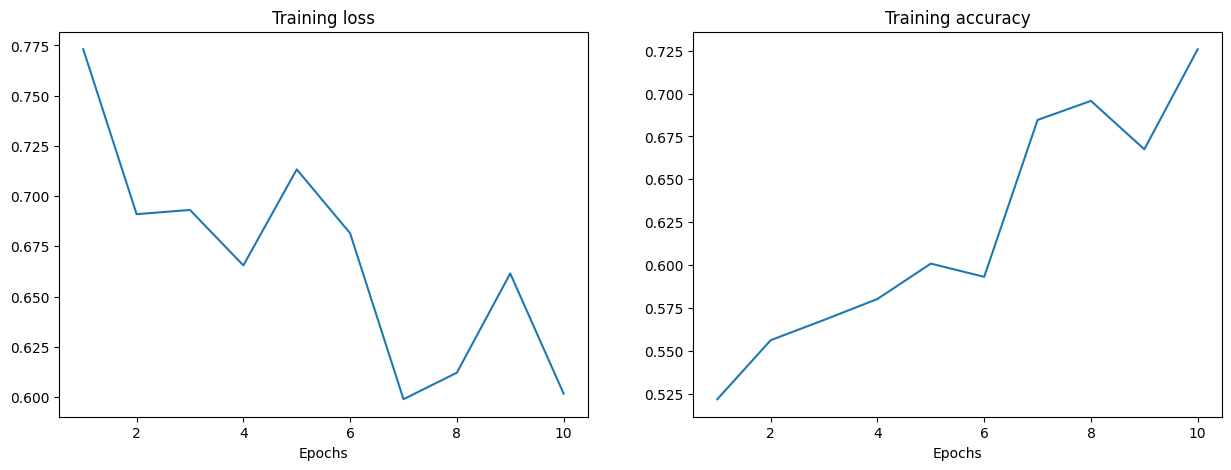

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(x=range(1,11), y=loss, ax=ax[0])
sns.lineplot(x=range(1,11), y=accuracy, ax=ax[1])

ax[0].set_title('Training loss')
ax[1].set_title('Training accuracy');
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs');